In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
# Generate some data
from sklearn.datasets import make_blobs
# X, y_true = make_blobs(n_samples=30, centers=2,
#                        cluster_std=0.7, random_state=0)
# X = X[:, ::-1]

In [3]:
X, clusters = make_blobs(n_samples = 50,
                  n_features = 2, 
                  centers = 2,
                  cluster_std = 0.7,
                  shuffle = False,
                        random_state=0)

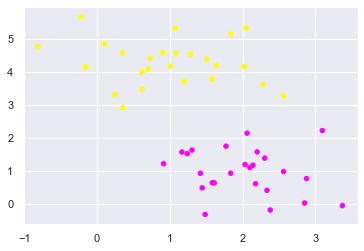

In [4]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='spring');

In [5]:
# rng = np.random.RandomState(13)
# X = np.dot(X, rng.randn(2, 2))
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='spring');

In [6]:
# Returns 3 nearest neighbours inclucing itself
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)
    return sum(np.argsort(dist_2)[:4])

In [7]:
# Returns the p-values of a
def p_val(a):
    t = 0
    for i in a:
        t = t+1 if i>= a[len(a)-1] else t
    return t/len(a)

In [8]:
# Preparing the points in the virtual space to be explored.
# Virtual feature space can be controlled via commenting out the appropriate appends.
G=[]
for i in range(0,len(X)):
    for j in range(0, len(X)):
        G.append([X[i][0],X[j][0]]) if [[X[i][0],X[j][0]]] not in G else G;
        G.append([X[i][0],X[j][1]]) if [[X[i][0],X[j][1]]] not in G else G;
        G.append([X[i][0],X[i][0]]) if [[X[i][0],X[i][0]]] not in G else G;
        G.append([X[i][0],X[i][1]]) if [[X[i][0],X[i][1]]] not in G else G;
        
        G.append([X[i][1],X[j][0]]) if [[X[i][1],X[j][0]]] not in G else G;
        G.append([X[i][1],X[j][1]]) if [[X[i][1],X[j][1]]] not in G else G;
        G.append([X[i][1],X[i][0]]) if [[X[i][1],X[i][0]]] not in G else G;
        G.append([X[i][1],X[i][1]]) if [[X[i][1],X[i][1]]] not in G else G;
        
        G.append([X[j][0],X[i][0]]) if [[X[j][0],X[i][0]]] not in G else G;
        G.append([X[j][0],X[i][1]]) if [[X[j][0],X[i][1]]] not in G else G;
        G.append([X[j][0],X[j][0]]) if [[X[j][0],X[j][0]]] not in G else G;
        G.append([X[j][0],X[j][1]]) if [[X[j][0],X[j][1]]] not in G else G;
        
        G.append([X[j][1],X[i][0]]) if [[X[j][1],X[i][0]]] not in G else G;
        G.append([X[j][1],X[i][1]]) if [[X[j][1],X[i][1]]] not in G else G;
        G.append([X[j][1],X[j][0]]) if [[X[j][1],X[j][0]]] not in G else G;
        G.append([X[j][1],X[j][1]]) if [[X[j][1],X[j][1]]] not in G else G;
        
# Converting into float
G = [[float(i[0]),float(i[1])] for i in G]

# Initializing different significance level
E2 = [x for x in range(1,10,2)]
E = [x/10 for x in E2]

In [9]:
# get the total size of the all the points in the space to be explored.
len(G)

40000

In [10]:
# Initializing arrays to record non-conformity score
from array import array
A = array('f',range(X.shape[0]+1))
P = np.zeros(len(G))

In [11]:
# Calculating p-values for every points in G
X2 = X.tolist()
for i in range(0,len(G)):
    z = G[i]
    X2.append(z)
    for j in range(0,len(A)):
        A[j] = closest_node(X2[j],np.asarray(X2))
    X2.pop()
    P[i] = p_val(A)

In [12]:
# Labelling the samples at a significance level 0.05
lbl=[]
for i in P:
    lbl.append(1) if i <= 0.05 else lbl.append(0)
    
# Get points in G conforming at the aforementioned significance level
q=[]
for i in range(0,len(G)):
    q.append(G[i]) if lbl[i]==1 else q

# Get points in G conforming at the aforementioned significance level
r=[]
for i in range(0,len(G)):
    r.append(G[i]) if lbl[i]==0 else r

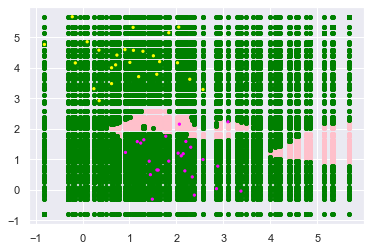

In [13]:
# Plotting the datapoints and the region of conformity 
import matplotlib.pyplot as plt
import itertools
colors = itertools.cycle(["r", "g"]);
plt.scatter(np.asarray(q)[:,0], np.asarray(q)[:,1], s=15, c='pink', zorder=1);
plt.scatter(np.asarray(r)[:,0], np.asarray(r)[:,1], s=15, c='green', zorder=1);
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5,cmap='spring',  zorder=2);

In [14]:
# Labelling the samples at a significance level 0.25
lbl=[]
for i in P:
    lbl.append(1) if i <= 0.25 else lbl.append(0)
    
# Get points in G conforming at the aforementioned significance level
q=[]
for i in range(0,len(G)):
    q.append(G[i]) if lbl[i]==1 else q

# Get points in G conforming at the aforementioned significance level
r=[]
for i in range(0,len(G)):
    r.append(G[i]) if lbl[i]==0 else r

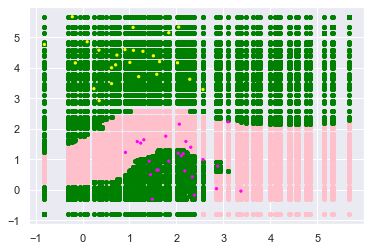

In [15]:
# Plotting the datapoints and the region of conformity 
import matplotlib.pyplot as plt
import itertools
colors = itertools.cycle(["r", "g"]);
plt.scatter(np.asarray(q)[:,0], np.asarray(q)[:,1], s=15, c='pink', zorder=1);
plt.scatter(np.asarray(r)[:,0], np.asarray(r)[:,1], s=15, c='green', zorder=1);
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5,cmap='spring',  zorder=2);